In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
bestw = None


mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# Problem 6b
def train(X, Y, lamd):
    d = X.shape[1]
    left = X.T@X + lamd * np.eye(d,d)
    right = X.T@Y
    W_hat = np.linalg.solve(left, right)
    return W_hat

In [6]:
def predict(W, Xprime):
    prediction = np.argmax(Xprime@W, axis = 1)
    return prediction

In [7]:
# Turn labels_train into one hot code
Y_train = np.zeros((X_train.shape[0], 10))
for i,number in enumerate(labels_train):
    Y_train[i, number] = 1

In [ ]:
W = train(X_train, Y_train, 10**(-4))
train_pre = predict(W, X_train)
test_pre = predict(W, X_test)

test_error = sum([1 for i in range(len(test_pre)) if test_pre[i] != labels_test[i] ]) / len(test_pre)
train_error = sum([1 for i in range(len(train_pre)) if train_pre[i] != labels_train[i] ]) / len(train_pre)

print("Training error:", train_error)
print("Test error:", test_error)

In [11]:
# Problem 6c)
variance = 0.1
lam = 0.01
p_value = [500*i for i in range(1, 13)]
train_percent = 0.8
ori_train_size = X_train.shape[0]
ori_test_size = X_test.shape[0]
d = X_train.shape[1]
train_error_record = []
validation_error_record = []

p value =  500
training error:  0.232875
validation error:  0.24183333333333334
p value =  1000
training error:  0.13441666666666666
validation error:  0.15433333333333332
p value =  1500
training error:  0.0965
validation error:  0.11533333333333333
p value =  2000
training error:  0.0783125
validation error:  0.10183333333333333
p value =  2500
training error:  0.059625
validation error:  0.07833333333333334
p value =  3000
training error:  0.050458333333333334
validation error:  0.07491666666666667
p value =  3500
training error:  0.0414375
validation error:  0.07008333333333333
p value =  4000
training error:  0.036291666666666667
validation error:  0.06208333333333333
p value =  4500
training error:  0.03135416666666667
validation error:  0.0585
p value =  5000
training error:  0.025625
validation error:  0.0555
p value =  5500
training error:  0.0223125
validation error:  0.05341666666666667
p value =  6000
training error:  0.020854166666666667
validation error:  0.05283333333333

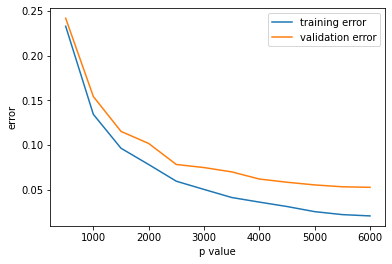

In [12]:
# randomly select 80 percent of train data and 20 percent of validation data
index = np.arange(ori_train_size)
np.random.shuffle(index)
train_index = index[0:int(train_percent * ori_train_size)]
validation_index = index[int(train_percent * ori_train_size) : ]

# use the shuffled index to change the original data to random, select corresponding rows
shuffled_labels_validation = labels_train[validation_index]
shuffled_labels_train = labels_train[train_index]
new_Y_train = Y_train[train_index, :]

for p in p_value:
    print("p value = ", p)
    #choose G to be a random matrix, with each entry sampled i.i.d. from a Gaussian 
    #choose b to be a random vector sampled i.i.d. from the uniform distribution
    G = np.random.normal(0, np.sqrt(variance), size = (p,d))
    b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 
    
    # Since we need the whole matrix, from the formula given, we need to X = cos(X_train*G^T) + b^T
    # python "+" will plus b by each column
    transed_X_train= np.cos(np.dot(X_train, G.T) + b.T)
    new_X_train = transed_X_train[train_index, :]
    new_X_validate = transed_X_train[validation_index, :]
    
    # use the function in the previous problem to fit a model and then predict
    Wp = train(new_X_train, new_Y_train, lam)
    train_pre = predict(Wp, new_X_train)
    validation_pre = predict(Wp, new_X_validate)
    
    train_error = sum([1 for i in range(len(train_pre)) if train_pre[i] != shuffled_labels_train[i] ]) / len(train_pre)
    validation_error = sum([1 for i in range(len(validation_pre)) if validation_pre[i] != shuffled_labels_validation[i] ]) / len(validation_pre)
    train_error_record.append(train_error)
    validation_error_record.append(validation_error)


    print("training error: ", train_error)
    print("validation error: ", validation_error)


plt.plot(p_value, train_error_record)
plt.plot(p_value, validation_error_record)
plt.xlabel('p value')
plt.ylabel('error')
plt.legend(["training error", "validation error"])
plt.show()

In [13]:
variance = 0.1
p = 6000
d = X_test.shape[1]
G = np.random.normal(0, np.sqrt(variance), size = (p,d))
b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 

index = np.arange(X_train.shape[0])
np.random.shuffle(index)
train_index = index[0:int(0.8 * X_train.shape[0])]
validation_index = index[int(0.8 * X_train.shape[0]) : ]

shuffled_labels_validation = labels_train[validation_index]
shuffled_labels_train = labels_train[train_index]

new_Y_train = Y_train[train_index, :]
transed_X_train= np.cos(np.dot(X_train, G.T) + b.T)

new_X_train = transed_X_train[train_index, :]
new_X_validate = transed_X_train[validation_index, :]

Wp = train(new_X_train, new_Y_train, lam)

traned_X_test = np.cos(np.dot(X_test, G.T) + b.T)
test_pre = predict(Wp, traned_X_test)
test_error = sum([1 for i in range(len(test_pre)) if test_pre[i] != labels_test[i] ]) / len(test_pre)
q = X_test.shape[0]
interval = np.sqrt(np.log(40) /  (2*q))

In [14]:
print("test error: ", test_error)

print("95% confidence interval:")
print( test_error - interval, ", ", test_error + interval)

test error:  0.048
95% confidence interval:
0.03441898484259381 ,  0.061581015157406195


In [15]:
variance = 0.1
p = 6000
d = X_test.shape[1]
G = np.random.normal(0, np.sqrt(variance), size = (p,d))
b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 

index = np.arange(X_train.shape[0])
np.random.shuffle(index)
train_index = index[0:int(0.8 * X_train.shape[0])]
validation_index = index[int(0.8 * X_train.shape[0]) : ]

shuffled_labels_validation = labels_train[validation_index]
shuffled_labels_train = labels_train[train_index]

new_Y_train = Y_train[train_index, :]
X= np.cos(np.dot(X_train, G.T) + b.T)

new_X_train = transed_X_train[train_index, :]
new_X_validate = transed_X_train[validation_index, :]

Wp = train(X, labels_train, lam)

X_ttt = np.cos(np.dot(X_test, G.T) + b.T)
test_pre = predict(Wp, X_ttt)
error = sum(test_pre == labels_test) / test_pre.size

print("test error: ", test_error)

print("95% confidence interval:")
print( test_error - interval, ", ", test_error + interval)

array([[-6.74126957e-04,  8.77826530e-04,  1.25471870e-03, ...,
        -5.07450972e-05,  1.45705655e-04, -7.13207806e-04],
       [-1.51913060e-03,  3.45378333e-04,  2.12841656e-04, ...,
         9.33724200e-04,  4.91370021e-04,  8.08656172e-04],
       [-2.63943107e-03,  2.28774533e-03, -2.81732973e-03, ...,
        -1.48127794e-03, -3.44840619e-04, -2.22428311e-03],
       ...,
       [-4.62287965e-05,  8.63129422e-04, -1.83383374e-03, ...,
         1.62816803e-03,  1.29383687e-03,  2.85500513e-03],
       [-3.43153283e-04,  1.03529290e-03, -5.81615759e-04, ...,
        -7.46094699e-04, -3.14441978e-04, -4.35252521e-03],
       [ 7.83135669e-04, -3.45949454e-05,  6.66573030e-04, ...,
         2.15913132e-03, -4.33895253e-03,  1.24720563e-03]])